### Data regression on the global plastics production

R² score (training): 0.9163
R² score (validation): 0.8211
R² score (test): 0.7991


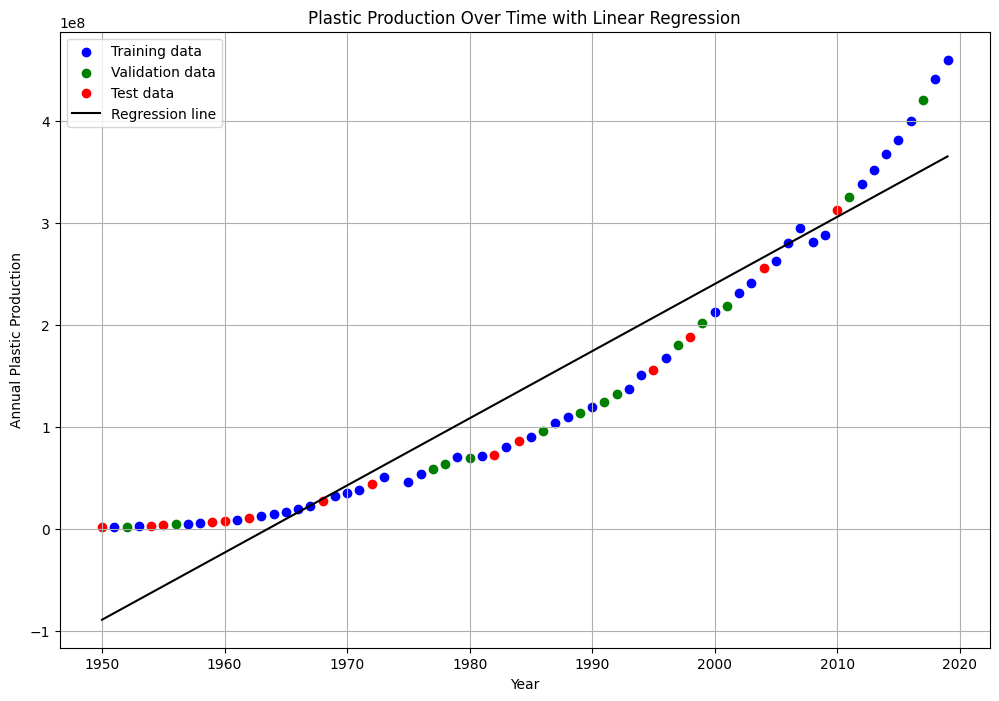

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('global-plastics-production.csv')
X = df[['Year']].values
y = df['Annual plastic production between 1950 and 2019'].values

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'R² score (training): {train_r2:.4f}')
print(f'R² score (validation): {val_r2:.4f}')
print(f'R² score (test): {test_r2:.4f}')

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_val, y_val, color='green', label='Validation data')
plt.scatter(X_test, y_test, color='red', label='Test data')

X_plot = np.array([[df['Year'].min()], [df['Year'].max()]])
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='black', label='Regression line')

plt.xlabel('Year')
plt.ylabel('Annual Plastic Production')
plt.title('Plastic Production Over Time with Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

R² score (training): 0.9163 (91.63%)
This is the score on the training data (60% of your dataset)
It shows that the model explains 91.63% of the variance in plastic production in the training data
The high score indicates that the model fits the training data very well
However, this alone doesn't guarantee good predictions on new data
R² score (validation): 0.8211 (82.11%)
This is the score on the validation data (20% of your dataset)
The lower score (compared to training) is normal and expected
The gap between training (91.63%) and validation (82.11%) suggests some overfitting
Validation score helps us assess how well the model will perform on unseen data
R² score (test): 0.7991 (79.91%)
This is the score on the test data (20% of your dataset)
This is your model's true performance metric on completely unseen data
The score is slightly lower than validation but still reasonably good
It indicates that your model explains about 80% of the variance in plastic production on new data
The decreasing pattern (0.9163 → 0.8211 → 0.7991) is common and tells us:
There is some overfitting (the model learned patterns specific to the training data)
The model still generalizes reasonably well (test score ~80% is still good)
The relationship between year and plastic production is mostly linear but has some non-linear components that the model can't capture

R² score (training): 0.7644
R² score (validation): 0.7523
R² score (test): 0.9553


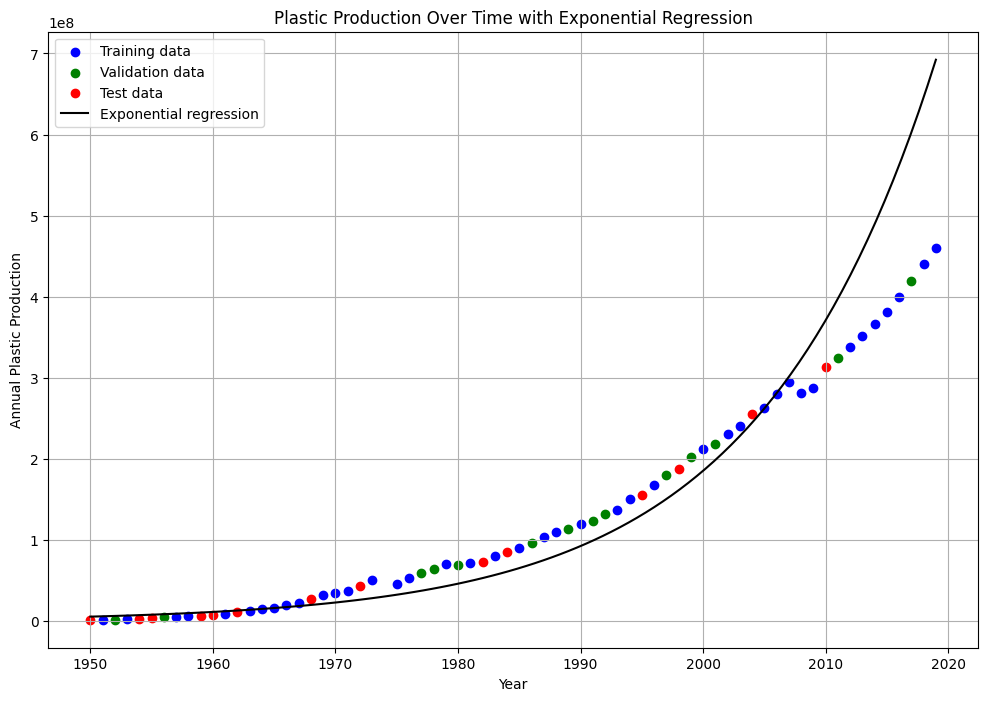


Yearly growth rate: 7.17%


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('global-plastics-production.csv')
X = df[['Year']].values
y = df['Annual plastic production between 1950 and 2019'].values

y_log = np.log(y)

X_temp, X_test, y_temp, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred_log = model.predict(X_train)
y_val_pred_log = model.predict(X_val)
y_test_pred_log = model.predict(X_test)

y_train_pred = np.exp(y_train_pred_log)
y_val_pred = np.exp(y_val_pred_log)
y_test_pred = np.exp(y_test_pred_log)

train_r2 = r2_score(np.exp(y_train), y_train_pred)
val_r2 = r2_score(np.exp(y_val), y_val_pred)
test_r2 = r2_score(np.exp(y_test), y_test_pred)

print(f'R² score (training): {train_r2:.4f}')
print(f'R² score (validation): {val_r2:.4f}')
print(f'R² score (test): {test_r2:.4f}')

plt.figure(figsize=(12, 8))
plt.scatter(X_train, np.exp(y_train), color='blue', label='Training data')
plt.scatter(X_val, np.exp(y_val), color='green', label='Validation data')
plt.scatter(X_test, np.exp(y_test), color='red', label='Test data')

X_plot = np.linspace(df['Year'].min(), df['Year'].max(), 100).reshape(-1, 1)
y_plot = np.exp(model.predict(X_plot))
plt.plot(X_plot, y_plot, color='black', label='Exponential regression')

plt.xlabel('Year')
plt.ylabel('Annual Plastic Production')
plt.title('Plastic Production Over Time with Exponential Regression')
plt.legend()
plt.grid(True)
plt.show()

growth_rate = np.exp(model.coef_[0]) - 1
print(f'\nYearly growth rate: {growth_rate:.2%}')

Test Score (0.9553 or 95.53%):
This is surprisingly high and much better than the linear model
It confirms that plastic production indeed follows an exponential pattern
The model performs exceptionally well on unseen data
Training (0.7644) and Validation (0.7523) Scores:
These scores are lower than the test score, which is unusual
The very close values between training and validation (only 0.0121 difference) suggest good consistency in model performance
The lower training/validation scores might be due to:
Random chance in the data split
Some outliers or irregular patterns in the training/validation sets
Possible anomalies in the data during certain time periods
The key insights:
The exponential model is a better fit than the linear model (test score of 95.53% vs ~80%)
The model is not overfitting (unlike the linear model where training score was higher)

### Prediction of the plastic production for the years

R² score (training): 0.7644
R² score (validation): 0.7523
R² score (test): 0.9553


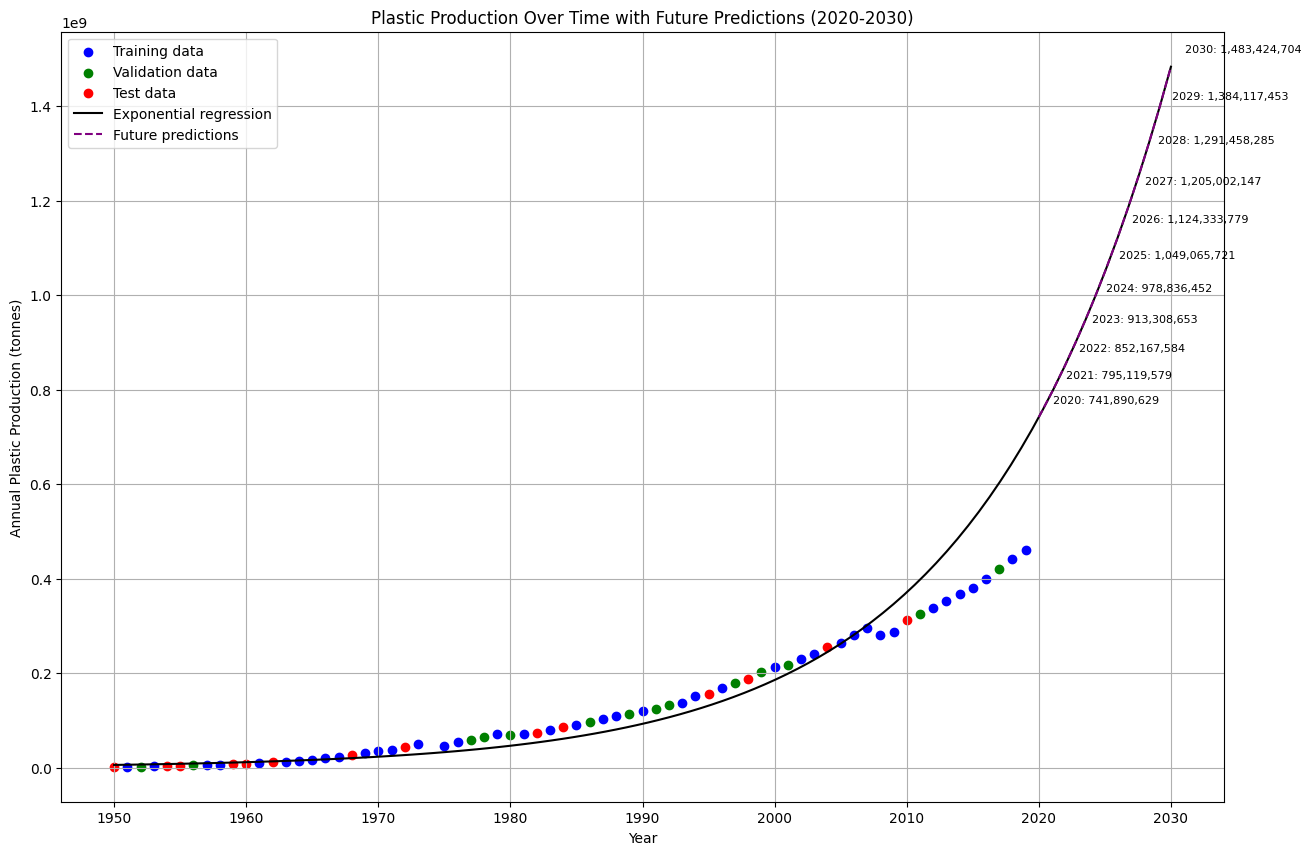


Yearly growth rate: 7.17%

Predicted plastic production for 2020-2030:
Year 2020: 741,890,629 tonnes
Year 2021: 795,119,579 tonnes
Year 2022: 852,167,584 tonnes
Year 2023: 913,308,653 tonnes
Year 2024: 978,836,452 tonnes
Year 2025: 1,049,065,721 tonnes
Year 2026: 1,124,333,779 tonnes
Year 2027: 1,205,002,147 tonnes
Year 2028: 1,291,458,285 tonnes
Year 2029: 1,384,117,453 tonnes
Year 2030: 1,483,424,704 tonnes


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('global-plastics-production.csv')
X = df[['Year']].values
y = df['Annual plastic production between 1950 and 2019'].values

y_log = np.log(y)

X_temp, X_test, y_temp, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred_log = model.predict(X_train)
y_val_pred_log = model.predict(X_val)
y_test_pred_log = model.predict(X_test)

y_train_pred = np.exp(y_train_pred_log)
y_val_pred = np.exp(y_val_pred_log)
y_test_pred = np.exp(y_test_pred_log)

train_r2 = r2_score(np.exp(y_train), y_train_pred)
val_r2 = r2_score(np.exp(y_val), y_val_pred)
test_r2 = r2_score(np.exp(y_test), y_test_pred)

print(f'R² score (training): {train_r2:.4f}')
print(f'R² score (validation): {val_r2:.4f}')
print(f'R² score (test): {test_r2:.4f}')

future_years = np.array(range(2020, 2031)).reshape(-1, 1)

future_predictions = np.exp(model.predict(future_years))

plt.figure(figsize=(15, 10))

plt.scatter(X_train, np.exp(y_train), color='blue', label='Training data')
plt.scatter(X_val, np.exp(y_val), color='green', label='Validation data')
plt.scatter(X_test, np.exp(y_test), color='red', label='Test data')

X_plot = np.linspace(df['Year'].min(), 2030, 100).reshape(-1, 1)
y_plot = np.exp(model.predict(X_plot))
plt.plot(X_plot, y_plot, color='black', label='Exponential regression')

plt.plot(future_years, future_predictions, color='purple', linestyle='--', label='Future predictions')

plt.xlabel('Year')
plt.ylabel('Annual Plastic Production (tonnes)')
plt.title('Plastic Production Over Time with Future Predictions (2020-2030)')
plt.legend()
plt.grid(True)

for i in range(len(future_years)):
    year = future_years[i][0]
    value = future_predictions[i]
    plt.annotate(f'{year}: {value:,.0f}', 
                xy=(year, value), 
                xytext=(10, 10),
                textcoords='offset points',
                fontsize=8)

plt.show()

growth_rate = np.exp(model.coef_[0]) - 1
print(f'\nYearly growth rate: {growth_rate:.2%}')

print("\nPredicted plastic production for 2020-2030:")
for i, year in enumerate(future_years):
    print(f"Year {year[0]}: {future_predictions[i]:,.0f} tonnes")

### classification of the fish health to know if the fish is healthy or not

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import folium

def preprocess_data(data):
    selected_columns = ['Measurement', 'Density Class', 'Latitude', 'Longitude', 'Oceans']
    df = data[selected_columns].copy()
    df = df.dropna()
    low_measurement = df['Measurement'].quantile(0.33)
    high_measurement = df['Measurement'].quantile(0.66)
    very_high_measurement = df['Measurement'].quantile(0.90)
    
    def determine_health(row):
        if (row['Measurement'] > very_high_measurement) or \
           (row['Measurement'] > high_measurement and row['Density Class'] in ['High', 'Very High']):
            return 0
        elif row['Measurement'] <= low_measurement and row['Density Class'] in ['Very Low', 'Low']:
            return 2
        else:
            return 1
    
    df['Health'] = df.apply(determine_health, axis=1)
    print("\nHealth Distribution:")
    print(df['Health'].map({0: 'Poor Health', 1: 'Average Health', 2: 'Good Health'}).value_counts())
    return df

def evaluate_model(y_test, y_pred, model, X_test_scaled):
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, 
                              target_names=['Poor Health', 'Average Health', 'Good Health']))
    
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn',
                xticklabels=['Poor Health', 'Average Health', 'Good Health'],
                yticklabels=['Poor Health', 'Average Health', 'Good Health'])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.close()

def create_health_map(df, model, scaler):
    df = df.reset_index(drop=True)
    X_map = scaler.transform(df[['Measurement', 'Latitude', 'Longitude']])
    predictions = model.predict(X_map)
    probabilities = model.predict_proba(X_map)
    
    m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()],
                  zoom_start=2)
    
    colors = {
        0: 'red',
        1: 'yellow',
        2: 'green'
    }
    
    health_labels = {
        0: 'Poor Health',
        1: 'Average Health',
        2: 'Good Health'
    }
    
    for idx in range(len(predictions)):
        health_level = predictions[idx]
        color = colors[health_level]
        row = df.iloc[idx]
        prob = max(probabilities[idx])
        
        popup_text = f"""
            <b>Health Status:</b> {health_labels[health_level]}<br>
            <b>Confidence:</b> {prob:.2%}<br>
            <b>Measurement:</b> {row['Measurement']:.3f}<br>
            <b>Density Class:</b> {row['Density Class']}<br>
        """
        
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=8,
            popup=folium.Popup(popup_text, max_width=300),
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=prob
        ).add_to(m)
    
    legend_html = """
    <div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000; background-color: white; padding: 10px; border: 2px solid grey; border-radius: 5px;">
    <p><b>Health Levels:</b></p>
    <p><span style='color: green;'>●</span> Good Health</p>
    <p><span style='color: yellow;'>●</span> Average Health</p>
    <p><span style='color: red;'>●</span> Poor Health</p>
    </div>
    """
    m.get_root().html.add_child(folium.Element(legend_html))
    m.save('fish_health_map_3llabel.html')
    print("Map saved successfully!")

def main():
    print("Loading data...")
    data = pd.read_csv('Marine_Microplastics_WGS84_-651975987808622941.csv')
    
    print("Preprocessing data...")
    df = preprocess_data(data)
    
    X = df[['Measurement', 'Latitude', 'Longitude']]
    y = df['Health']
    
    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print("Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Training model...")
    model, y_pred = train_model(X_train_scaled, X_test_scaled, y_train, y_test)
    
    print("Evaluating model...")
    evaluate_model(y_test, y_pred, model, X_test_scaled)
    
    print("Creating health map...")
    create_health_map(df, model, scaler)
    
    print("Process completed successfully!")

if __name__ == "__main__":
    main()

Loading data...
Preprocessing data...

Health Distribution:
Health
Average Health    7853
Good Health       4874
Poor Health       2040
Name: count, dtype: int64
Splitting data...
Scaling features...
Training model...

Performing grid search...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best parameters: {'C': 100, 'class_weight': {0: 2, 1: 1}, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validation score: 0.6177
Evaluating model...

Classification Report:
                precision    recall  f1-score   support

   Poor Health       0.62      0.70      0.65       431
Average Health       0.66      0.78      0.71      1549
   Good Health       0.57      0.36      0.45       974

      accuracy                           0.63      2954
     macro avg       0.61      0.62      0.60      2954
  weighted avg       0.62      0.63      0.62      2954

Creating health map...
Map saved successfully!
Process completed successfully!
